# Dask delay

Not everything reduces to what is inside numpy (dask array API).

Dask delayed allows you to:
  1. Make custom graphs with regular python code
  2. Scale them up to heterogeneous clusters

Let's setup the same infrastructure as before

In [7]:
# Local client
from dask import delayed
from dask.distributed import Client
n_workers = 5

def scale_to_sge(n_workers):
    queue="q_1day"
    queue_resource_spec="q_1day=TRUE"
    memory="4GB"
    sge_log= "./logs"
    from dask_jobqueue import SGECluster
    cluster = SGECluster(queue=queue, memory=memory, cores=1, processes=1,
              log_directory=sge_log,
              local_directory=sge_log,
              resource_spec=queue_resource_spec,
              project="citerus"
              )
    cluster.scale_up(n_workers)
    return Client(cluster)  # start local workers as threads


#### SWITH THIS IF YOU WANT TO RUN LOCALLY OR IN OUR SGE GRID ###

# Local client
#client = Client(n_workers=n_workers)

# SGE client
client = scale_to_sge(n_workers)




/idiap/user/tpereira/conda/envs/tam-dask/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [8]:
from time import sleep


def inc(x):
    sleep(0.5)
    return x + 1

def add(x, y):
    sleep(0.5)
    return x + y

x = inc(1)
y = inc(2)
z = add(x, y)
z

5

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


# Parallelization

Thinks can get more complex.
We can parallelize and distribute for loops



In [9]:
%%time
data = range(10)

results = []
for x in data:
    y = delayed(inc)(x)
    y = delayed(add)(y, y)
    results.append(y)
    
total = delayed(sum)(results)
#total
total.compute(scheduler=client)

CPU times: user 122 ms, sys: 11.9 ms, total: 134 ms
Wall time: 3.08 s


110

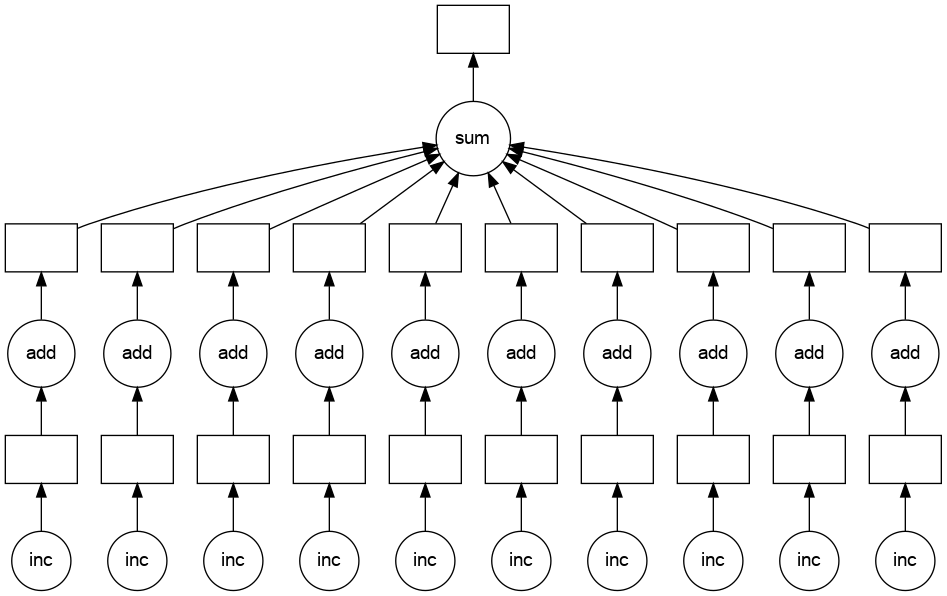

In [10]:
total.visualize()

In [11]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
